In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('data/Total_Renewable_Energy_Consumption_Monthly.csv',skiprows=4,index_col='Month',parse_dates=True)
df1.columns = ['total-renewable-energy-monthly']
df1 = df1.sort_index()
df1.head()

,total-renewable-energy-monthly
Month,
1973-01-01,403.981
1973-02-01,360.900
1973-03-01,400.161
1973-04-01,380.470
1973-05-01,392.141


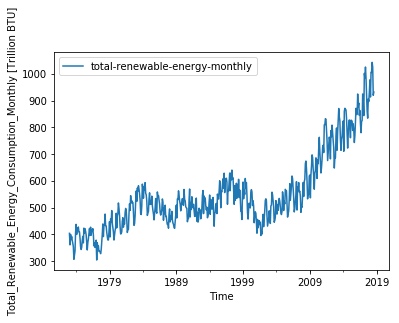

In [3]:
df1.plot()
plt.ylabel('Total_Renewable_Energy_Consumption_Monthly [Trillion BTU]')
plt.xlabel('Time')
plt.show()

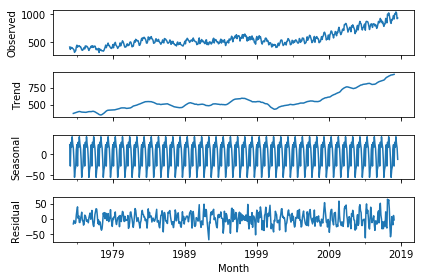

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df1['total-renewable-energy-monthly']).plot()
plt.show()

In [5]:
x1 = df1.groupby(df1.index.strftime('%Y')).idxmax()
x1.columns = ['month-max-consumption']
x1.head()

,month-max-consumption
1973,1973-12-01
1974,1974-01-01
1975,1975-03-01
1976,1976-03-01
1977,1977-12-01


In [6]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1973 to 2018
Data columns (total 1 columns):
month-max-consumption    46 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 736.0+ bytes


In [7]:
x2 = pd.DatetimeIndex(x1['month-max-consumption']).month

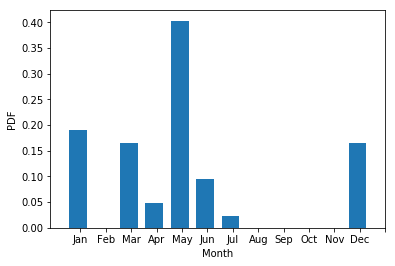

In [8]:
space = 11/12
x_month = [] #[1,,3,4,5,6,7,8,9,10,11,12]
for i in range(13):
    x_month.append(2+(i-1)*space)
    
x_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.hist(np.array(x2),bins=12,density=True,rwidth=0.7,align='left')
plt.xlabel('Month')
plt.ylabel('PDF')
plt.xlim([0,12])
plt.xticks(x_month,x_label)
plt.show()

In [9]:
df4 = pd.DataFrame()
for i in range(1973,2018):
    j = str(i)
    df4[j] = df1[j].reset_index()['total-renewable-energy-monthly']

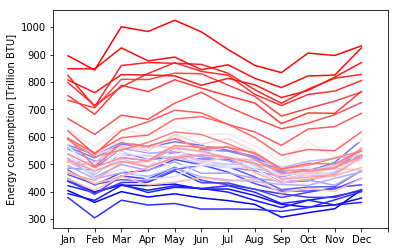

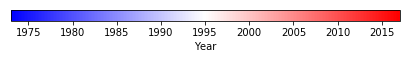

In [10]:
import matplotlib as mpl
df4.plot(colormap='bwr',legend=False)
plt.xticks(ticks=range(13),labels=x_label)
plt.ylabel('Energy consumption [Trillion BTU]')

# Colorbar
fig = plt.figure(figsize=(6, 1))
ax1 = fig.add_axes([1.05, 0.80, 0.9, 0.15])

cmap = mpl.cm.bwr
norm = mpl.colors.Normalize(vmin=1973, vmax=2017)

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Year')
plt.show()

In [11]:
df2 = pd.read_csv('data/Total_Renewable_Energy_Consumption_Annual.csv',skiprows=4,index_col='Year',parse_dates=True)
df2.columns = ['total-renewable-energy-annual']
df2 = df2.sort_index()
df2.head()

,total-renewable-energy-annual
Year,
1949-01-01,2973.984
1950-01-01,2977.718
1951-01-01,2958.464
1952-01-01,2940.181
1953-01-01,2831.460


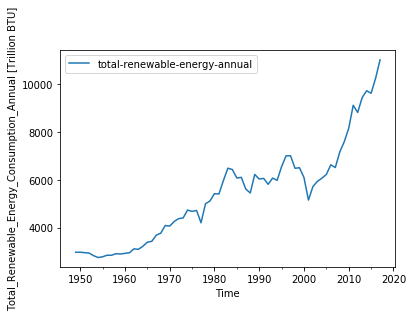

In [12]:
df2.plot()
plt.ylabel('Total_Renewable_Energy_Consumption_Annual [Trillion BTU]')
plt.xlabel('Time')
plt.show()